In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Exploratory Data Analysis (EDA)

In [2]:
train_set = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_set = pd.read_csv("/kaggle/input/titanic/test.csv")

In [5]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
test_set.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Null Value Imputation and Visualization

Omit extraneous column

In [46]:
trained_set = train_set[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
validation_set = test_set[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]


In [47]:
trained_set.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [48]:
validation_set.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [49]:
trained_set['Age'].fillna(trained_set['Age'].median(), inplace=True)
validation_set['Age'].fillna(validation_set['Age'].median(), inplace=True)

/tmp/ipykernel_30/1081734189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trained_set['Age'].fillna(trained_set['Age'].median(), inplace=True)
/tmp/ipykernel_30/1081734189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trained_set['Age'].fillna(trained_set['Age'].median(), inplace=True)
/tmp/ipykernel_30/1081734189.py:2: FutureWarn

In [50]:
trained_set.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [51]:
validation_set.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [52]:
trained_set['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [53]:
trained_set['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [54]:
trained_set['Age'].value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [55]:
trained_set['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [56]:
trained_set['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [57]:
trained_set['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [67]:
import matplotlib.pyplot as plt

In [107]:
Survival_Count_by_Gender = pd.crosstab(trained_set['Survived'], trained_set['Sex'], margins=True)

In [108]:
Survival_Count_by_Gender

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


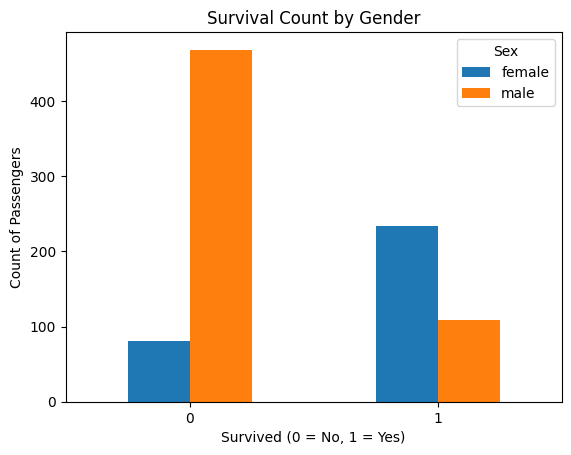

In [109]:
Survival_Count_by_Gender = Survival_Count_by_Gender.drop(index='All', columns='All')

Survival_Count_by_Gender.plot(kind='bar', stacked=False)
plt.title("Survival Count by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count of Passengers")
plt.xticks(rotation=0)
plt.show()

In [74]:
Survival_Count_by_Age = pd.crosstab(trained_set['Survived'], trained_set['Age'], margins=True)

In [75]:
Survival_Count_by_Age

Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,...,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0,All
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,0,2,3,1,2,1,2,1,0,549
1,1,1,2,2,1,5,3,5,7,4,...,2,0,0,0,0,0,0,0,1,342
All,1,1,2,2,1,7,10,6,10,4,...,2,2,3,1,2,1,2,1,1,891


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

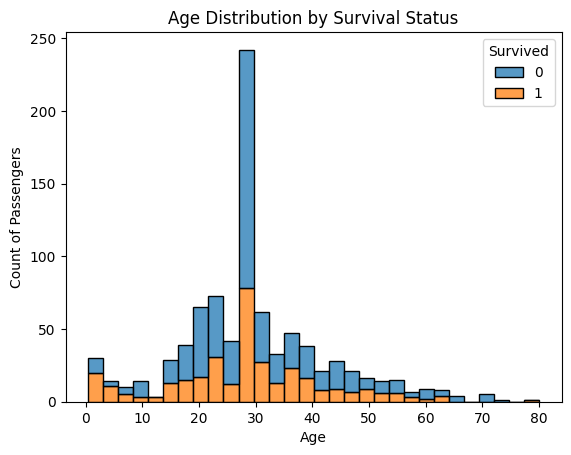

In [80]:
import seaborn as sns

sns.histplot(data=trained_set, x='Age', hue='Survived', multiple='stack')
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count of Passengers")
plt.show()


In [81]:
Survival_Count_by_Pclass = pd.crosstab(trained_set['Survived'], trained_set['Pclass'], margins=True)

In [82]:
Survival_Count_by_Pclass

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


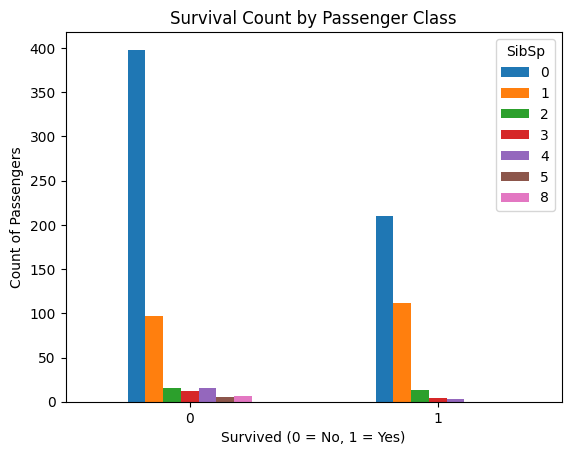

In [99]:
Survival_Count_by_Pclass = Survival_Count_by_Pclass.drop(index='All', columns='All')

Survival_Count_by_Pclass.plot(kind='bar', stacked=False)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count of Passengers")
plt.xticks(rotation=0)
plt.show()

In [95]:
Survival_Count_by_SibSp = pd.crosstab(trained_set['Survived'], trained_set['SibSp'], margins=True)

In [96]:
Survival_Count_by_SibSp

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


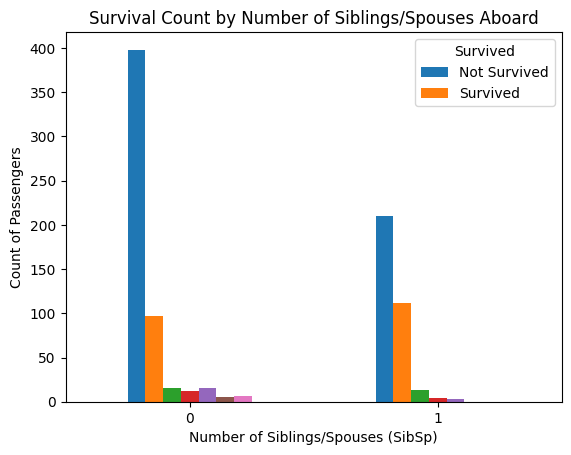

In [97]:
Survival_Count_by_SibSp = Survival_Count_by_SibSp.drop(index='All', columns='All')

Survival_Count_by_SibSp.plot(kind='bar', stacked=False)
plt.title("Survival Count by Number of Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses (SibSp)")
plt.ylabel("Count of Passengers")
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

In [114]:
Survival_Count_by_Parch = pd.crosstab(trained_set['Survived'], trained_set['Parch'], margins=True)

In [115]:
Survival_Count_by_Parch

Parch,0,1,2,3,4,5,6,All
Survived,,,,,,,,
0,445,53,40,2,4,4,1,549
1,233,65,40,3,0,1,0,342
All,678,118,80,5,4,5,1,891


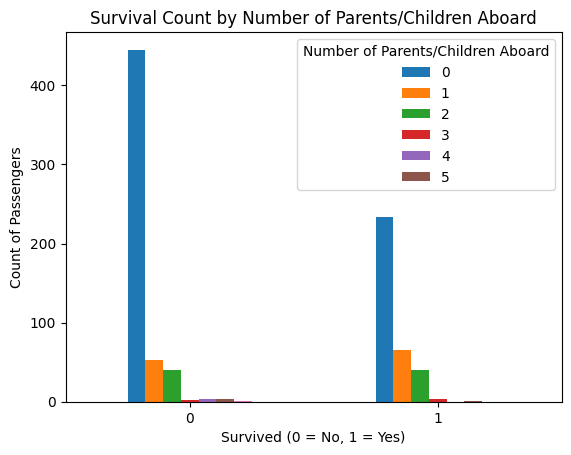

In [117]:
Survival_Count_by_Parch = Survival_Count_by_Parch.drop(index='All', columns='All')

Survival_Count_by_Parch.plot(kind='bar', stacked=False)
plt.title("Survival Count by Number of Parents/Children Aboard")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count of Passengers")
plt.xticks(rotation=0)
plt.legend(title='Number of Parents/Children Aboard', labels=[f'{i}' for i in Survival_Count_by_Parch.columns[:-1]])
plt.show()


In [118]:
Survival_Count_by_Fare = pd.crosstab(trained_set['Survived'], trained_set['Fare'], margins=True)

In [119]:
Survival_Count_by_Fare

Fare,0.0,4.0125,5.0,6.2375,6.4375,6.45,6.4958,6.75,6.8583,6.95,...,164.8667,211.3375,211.5,221.7792,227.525,247.5208,262.375,263.0,512.3292,All
Survived,,,,,,,,,,,,,,,,,,,,,
0,14,1,1,1,1,1,2,2,1,1,...,0,0,1,1,1,1,0,2,0,549
1,1,0,0,0,0,0,0,0,0,0,...,2,3,0,0,3,1,2,2,3,342
All,15,1,1,1,1,1,2,2,1,1,...,2,3,1,1,4,2,2,4,3,891


Heatmap of the survival count by fare groups

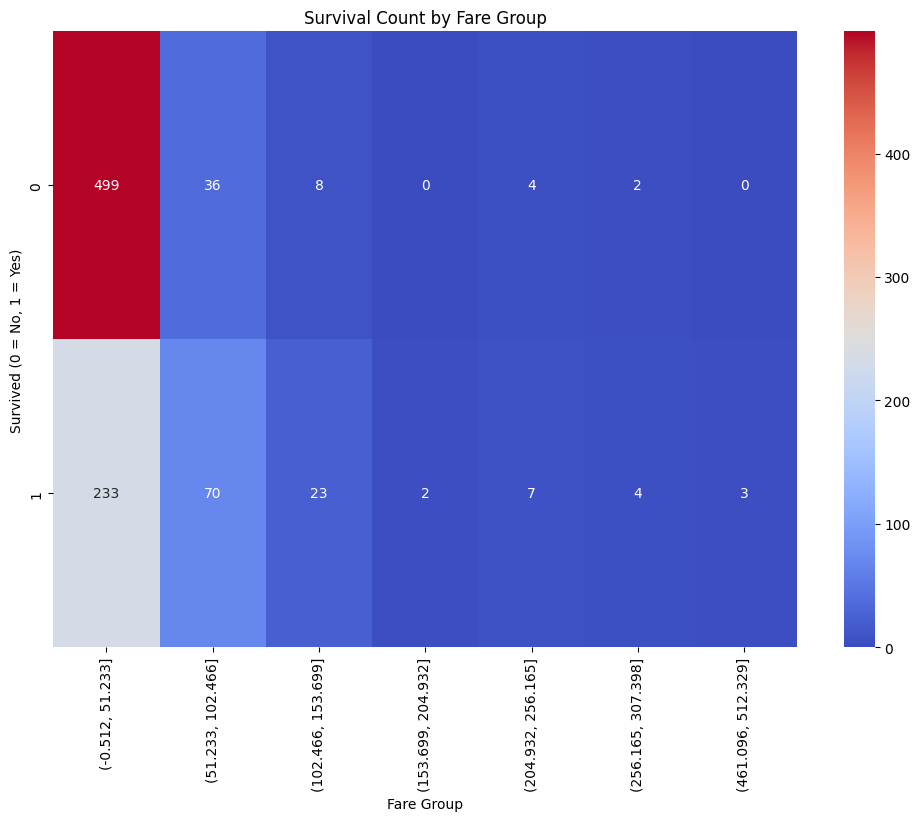

In [122]:
plt.figure(figsize=(12, 8))
sns.heatmap(Survival_Count_by_Fare_binned, annot=True, cmap='coolwarm', cbar=True, fmt='g')
plt.title("Survival Count by Fare Group")
plt.xlabel("Fare Group")
plt.ylabel("Survived (0 = No, 1 = Yes)")
plt.show()


In [127]:
Survival_Count_by_Embarked = pd.crosstab(trained_set['Survived'], trained_set['Embarked'], margins=True)

In [128]:
Survival_Count_by_Embarked

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


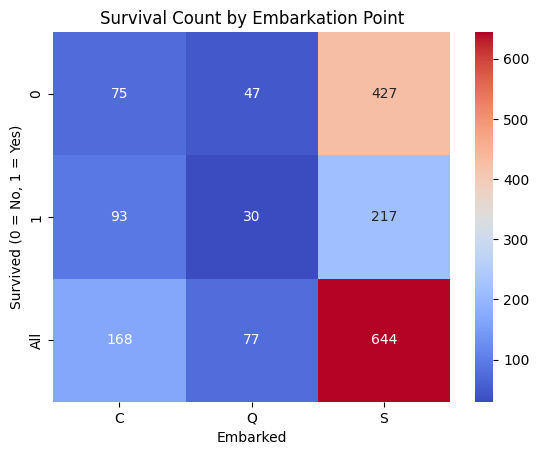

In [130]:
sns.heatmap(Survival_Count_by_Embarked.loc[:,'C':'S'], annot=True, cmap='coolwarm', fmt='d')
plt.title("Survival Count by Embarkation Point")
plt.xlabel("Embarked")
plt.ylabel("Survived (0 = No, 1 = Yes)")
plt.show()

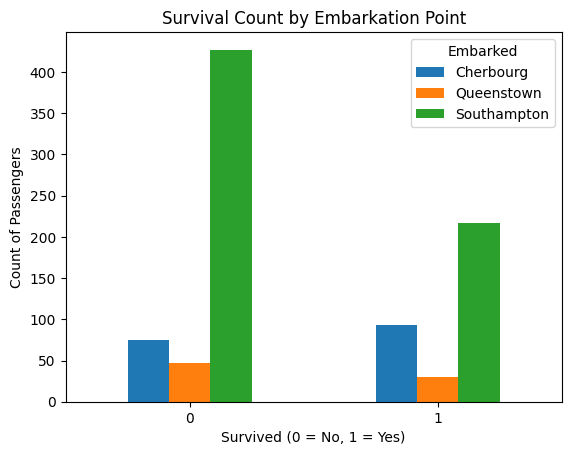

In [131]:
Survival_Count_by_Embarked = Survival_Count_by_Embarked.drop(index='All', columns='All')

Survival_Count_by_Embarked.loc[:,'C':'S'].plot(kind='bar', stacked=False)
plt.title("Survival Count by Embarkation Point")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count of Passengers")
plt.xticks(rotation=0)
plt.legend(title='Embarked', labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

## Transforming Raw Data into Insights

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [133]:
X = trained_set[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = trained_set['Survived']

In [134]:
imputer = SimpleImputer(strategy='mean')
X['Age'] = imputer.fit_transform(X[['Age']])

/tmp/ipykernel_30/584145051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = imputer.fit_transform(X[['Age']])


In [135]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [136]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [160]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log_reg))

Logistic Regression Accuracy: 0.8100558659217877


## k-Nearest Neighbors (k-NN)

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [159]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
print("k-NN Accuracy:", accuracy_score(y_val, y_pred_knn))

k-NN Accuracy: 0.6983240223463687


## Decision Trees

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_val)
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_decision_tree))

Decision Tree Accuracy: 0.776536312849162


## Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_random_forest))

Random Forest Accuracy: 0.8212290502793296


## Gradient Boosting

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_val)
print("Gradient Boosting Machines Accuracy:", accuracy_score(y_val, y_pred_gbm))

Gradient Boosting Machines Accuracy: 0.8100558659217877


## Support Vector Machines (SVM)

In [149]:
from sklearn.svm import SVC

In [155]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))

SVM Accuracy: 0.6536312849162011


## Neural Networks

In [151]:
from sklearn.neural_network import MLPClassifier

In [152]:
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_val)
print("Neural Network Accuracy:", accuracy_score(y_val, y_pred_nn))

Neural Network Accuracy: 0.7877094972067039
